# Exercício 1

O aluno deve amostrar duas distribuições normais no espaço R^2 , ou seja, duas distribuições com duas variáveis cada, gerando um conjunto de dados com duas classes. As distribuição são caracterizadas como N (2,2, σ = 0.8) e N (4, 4, σ = 0.4). O número de amostras será de 200 para cada classe.


## Resolução

Abaixo é possível observar o classificador de Bayes desenvolvido.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [20]:
# Bynary Bayes Classifier 
class bayes_classifier:

    # To initialize the parameters from the Bayes algorithm:
    def __init__(self):
        self.p_ci = None
        self.X_train = None
        self.y_train = None
        
    # Training the model
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        # Calculate P[C1], P[C2], ... , P[Cn]:
        n = np.unique(y).shape[0]
        self.p_ci =  np.zeros(n)
        for i in range(0,n):
            n_elements = np.count_nonzero(self.y_train==np.unique(self.y_train)[i])
            total_elements = self.y_train.shape[0]
            self.p_ci[i] = n_elements/total_elements
    
    def predict(self, X):
        # Calculate PDFs:
        n = np.unique(self.y_train).shape[0]
        mean_ci = np.zeros(2)
        pdf = np.zeros(n)
        y = np.zeros(X.shape[0])
        index = 0; 
        for x in X:
            for i in range(0,n):
                indexes = np.where(self.y_train==np.unique(self.y_train)[i])
                for col in range(0, self.X_train.shape[1]):
                    mean_ci[col] = np.mean(self.X_train[indexes,col])       
                cov = np.cov(self.X_train[indexes, 0], self.X_train[indexes, 1])
                pdf[i] = multivariate_normal.pdf(x, mean_ci, cov)
            
            K = (pdf[1] * self.p_ci[1])/(pdf[0] * self.p_ci[0])
            if K >= 1:
                y[index] = 1
            else:
                y[index] = 0
            index += 1
        return y


## Criação do Conjunto de Dados

In [3]:
X1 = np.random.normal(2, 0.4,size=[200,2])
X2 = np.random.normal(4, 0.4,size=[200,2])
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(200), np.ones(200)))

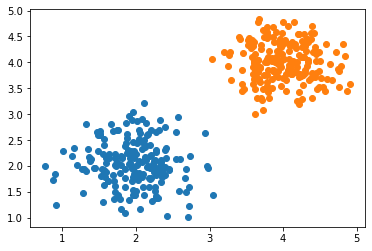

In [4]:
plt.figure()
plt.plot(X1[:,0], X1[:,1], 'o')
plt.plot(X2[:,0], X2[:,1], 'o')
plt.show()

## Separação em Conjunto de Treino e Teste

Como solicitado no exercício deve-se separar os dados em um conjunto de treinamento com 90% dos dados e um conjunto de testes com 10% dos dados de forma aleatória.

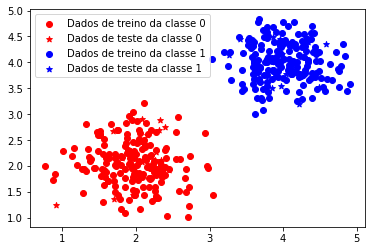

In [5]:
# Separate data between training and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# create scatter of these samples
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    row_ix2 = np.where(y_test == class_value)
    colors = ["red", "blue"]
    labels_train = ["Dados de treino da classe 0", "Dados de treino da classe 1"]
    labels_test = ["Dados de teste da classe 0", "Dados de teste da classe 1"]
    # create scatter of these samples
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], color=colors[class_value], label=labels_train[class_value])
    plt.scatter(X_test[row_ix2, 0], X_test[row_ix2, 1], marker='*', color=colors[class_value], label=labels_test[class_value])
    plt.legend()
# show the plot
plt.show()

## Treinamento e Aplicação do Classificador

In [6]:
clf = bayes_classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
df_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(df_confusion)

Matriz de Confusão:
[[19  0]
 [ 0 21]]


In [8]:
print("Acurácia: " + str(accuracy_score(y_test,y_pred)))

Acurácia: 1.0


Text(0.5, 0.92, 'Superfície de separação.')

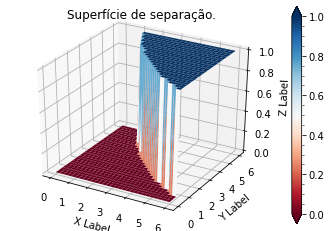

In [9]:
def plot_surface(model, plot_support=True, x_min_max=(0,6), y_min_max=(0,6),  vectors_color="none"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # create grid to evaluate model
    x = np.linspace(x_min_max[0], x_min_max[1], 30)
    y = np.linspace(y_min_max[0], y_min_max[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = clf.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    figure= ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='RdBu',edgecolor='none')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    cbar = fig.colorbar(figure, ax=ax, extend='both')
    cbar.minorticks_on()

plot_surface(model = clf);
plt.title("Superfície de separação.")

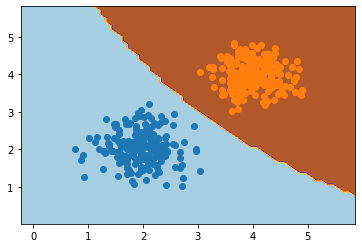

In [10]:
def plot_decision_border(X, y, clf):
    # decision surface for logistic regression on a binary classification dataset
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = clf.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
    # show the plot
    plt.show()

    
plot_decision_border(X, y, clf)

# Problema 2

Faça o mesmo que se pede no exercício anterior, mas agora os dados de entrada devem ser amostrados de quatro gaussianas como mostrado na figura 2. As classes devem ser como mostradas na figura (alternadas). Atenção que se você não considerar a covariância entre as variáveis o problema não terá solução. Faça uma análise dos resultados e comente
suas conclusões.


## Criação do Conjunto de Dados


In [11]:
X1_1 = np.random.normal([-1, 1], 0.4,size=[200,2])
X1_2 = np.random.normal([1,-1], 0.4,size=[200,2])
X2_1 = np.random.normal([-1,-1], 0.4,size=[200,2])
X2_2 = np.random.normal([1,1], 0.4,size=[200,2])
X = np.concatenate((X1_1, X1_2, X2_1, X2_2))
y = np.concatenate((np.zeros(400), np.ones(400)))

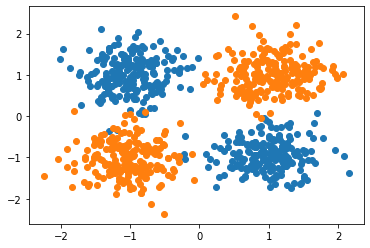

In [12]:
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

## Separação em Conjunto de Treino e Teste

Como solicitado no exercício deve-se separar os dados em um conjunto de treinamento com 90% dos dados e um conjunto de testes com 10% dos dados de forma aleatória.

In [13]:
clf = bayes_classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

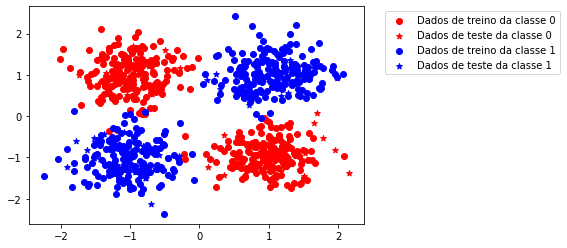

In [14]:
# Separate data between training and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# create scatter of these samples
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    row_ix2 = np.where(y_test == class_value)
    colors = ["red", "blue"]
    labels_train = ["Dados de treino da classe 0", "Dados de treino da classe 1"]
    labels_test = ["Dados de teste da classe 0", "Dados de teste da classe 1"]
    # create scatter of these samples
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], color=colors[class_value], label=labels_train[class_value])
    plt.scatter(X_test[row_ix2, 0], X_test[row_ix2, 1], marker='*', color=colors[class_value], label=labels_test[class_value])
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# show the plot
plt.show()

## Treinamento e Aplicação do Classificador

In [15]:
clf = bayes_classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
df_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(df_confusion)

Matriz de confusão:
[[36  1]
 [ 0 43]]


In [17]:
print("Acurácia: " + str(accuracy_score(y_test,y_pred)))

Acurácia: 0.9875


Text(0.5, 0.92, 'Superfície de separação.')

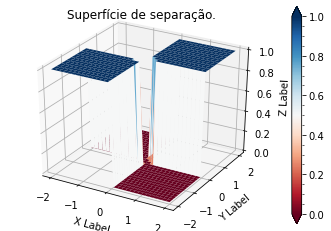

In [18]:
plot_surface(model = clf, x_min_max=(-2,2), y_min_max=(-2,2));
plt.title("Superfície de separação.")

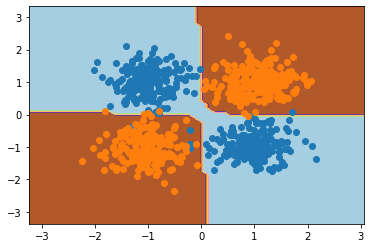

In [19]:
plot_decision_border(X, y, clf)

# Conclusão

Nesse exercício foi possível implementar e testar o funcionamento de um classificador de Bayes. Podê-se perceber sua eficácia em resolver problemas como os propostos, visto que para o exercício 1 obteve-se uma acurácia de 100% e para o exercício 2 uma acurácia próxima de 99%. 

Além disso, através das superfícies de separação mostradas e das matrizes de confusão obtidas foi possível visualizar a eficiência do modelo em classificar as amostras de ambas as classes dos problemas.  